In [1]:
### Hopf-Lax Minimization for Linear Hamilton Jacobi Reachability
# wsharpless@ucsd.edu

using LinearAlgebra, Plots
push!(LOAD_PATH,"/Users/willsharpless/Documents/Herbert/Koop_HJR/HL_fastHJR");
using HopfReachability

In [2]:
## System
# ẋ = Mx + Cu + C2d subject to y ∈ {(y-a)'Q(y-a) ≤ 1} for y=u,d

const dim = 2
const M = [0. 1; -2 -3]
const C = 0.5 * I
const C2 = 0.5 * [2 0; 0 1]
const Q = 0.1 * diagm(0 => 3*ones(dim), -1 => 1*ones(dim-1), 1 => 1*ones(dim-1))
const Q2 = 0.2 * diagm(0 => 2*ones(dim), -1 => 1*ones(dim-1), 1 => 1*ones(dim-1))
const a1 = [0.5 0.75]
const a2 = -[0.5 0]
const system = (M, C, C2, Q, Q2, a1, a2)

([0.0 1.0; -2.0 -3.0], UniformScaling{Float64}(0.5), [1.0 0.0; 0.0 0.5], [0.30000000000000004 0.1; 0.1 0.30000000000000004], [0.4 0.2; 0.2 0.4], [0.5 0.75], [-0.5 -0.0])

In [3]:
## Target
# J(x) = 0 is the boundary of the target

const aJ = cat([2.5, 1], 0.5*ones(dim - 2), dims=1)
const J  = x -> sum(abs2, x./aJ)/2 - 0.5
const Js = v -> sum(abs2, v.*aJ)/2 + 0.5
const target = (J, Js)

(var"#1#2"(), var"#3#4"())

In [4]:
## Lookback Time(s)

const Th = 0.1
const Tf = 0.7
const T = collect(Th : Th : Tf)

7-element Vector{Float64}:
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7

In [5]:
## Grid Parameters (optional, deafult here)

const bd = 3
const ϵ = 0.5e-7
const N = 10 + ϵ
const th = 0.02
const grid_p = (bd, ϵ, N, th)

## Hopf Coordinate-Descent Parameters (optional, deafult here)

const vh = 0.01
const L = 5
const tol = ϵ
const lim = 500
const lll = 20
const opt_p = (vh, L, tol, lim, lll)

(0.01, 5, 5.0e-8, 500, 20)

   for t=-0.1...
   for t=-0.2...
   for t=-0.3...
   for t=-0.4...
   for t=-0.5...
   for t=-0.6...
   for t=-0.7...
MEAN TIME: 0.050478088132861636


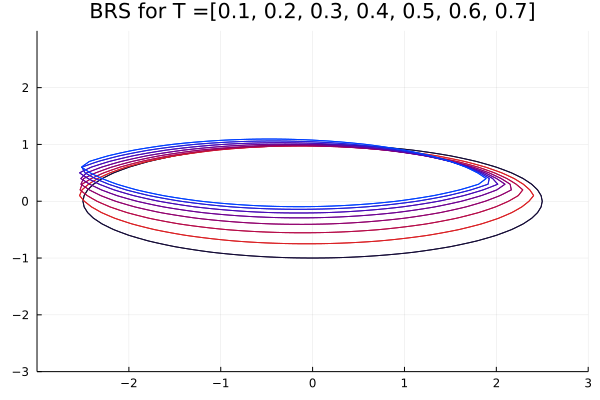

In [6]:
## Run the solver

solution, averagetime = HopfReachability.Hopf_BRS(system, target, T; plotting=true);
plot!(title="BRS for T ="*string(T))